# 3. **Data Preprocessing:**
   - Handle missing values, if any.
   - Tokenize and preprocess the text summaries.
   - Decide on a strategy to embed or vectorize the text data.
   - Split the training data for validation purposes.

## Previous Codes

In [6]:
import pandas as pd

# Load datasets
prompts_test = pd.read_csv("../data/prompts_test.csv")
prompts_train = pd.read_csv("../data/prompts_train.csv")
summaries_test = pd.read_csv("../data/summaries_test.csv")
summaries_train = pd.read_csv("../data/summaries_train.csv")

# Drop student_id column from summaries_train and summaries_test
summaries_train = summaries_train.drop(columns=['student_id'])
summaries_test = summaries_test.drop(columns=['student_id'])

id_mapping = {id_val: idx for idx, id_val in enumerate(prompts_train['prompt_id'].unique())}

summaries_train['prompt_id'] = summaries_train['prompt_id'].replace(id_mapping)
summaries_test['prompt_id'] = summaries_test['prompt_id'].replace(id_mapping)

In [7]:
print(summaries_train.keys())

Index(['prompt_id', 'text', 'content', 'wording'], dtype='object')


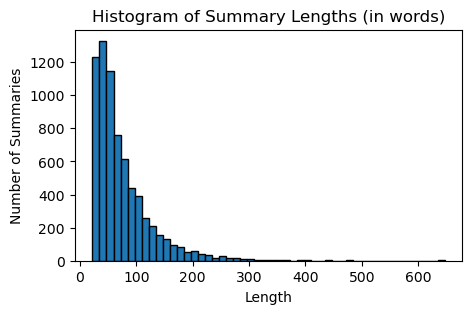

In [8]:
import matplotlib.pyplot as plt

# Split the 'text' column by spaces and get the length of each split text
lengths = summaries_train['text'].apply(lambda x: len(x.split()))

# Plot the histogram of lengths
plt.figure(figsize=(5, 3))
plt.hist(lengths, bins=50, edgecolor='black')
plt.title('Histogram of Summary Lengths (in words)')
plt.xlabel('Length')
plt.ylabel('Number of Summaries')
plt.show()


## Tokenize

In [9]:
from transformers import BertTokenizer

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [10]:
# Tokenize the 'text' column
texts = summaries_train['text'].tolist()
tokens = tokenizer(texts, padding=True, truncation=True, return_tensors="pt", max_length=128)


In [11]:
# Extracting the token components
input_ids = tokens['input_ids']
attention_masks = tokens['attention_mask']

# Displaying some basic information about the tokens
print(f"Number of sequences: {len(input_ids)}")
print(f"Average sequence length: {input_ids.shape[1]}")
print(f"Number of tokens in the first sequence: {sum(attention_masks[1]).item()}")

# If you want to see the actual tokens of the first sequence, you can decode it like this:
decoded_text = tokenizer.decode(input_ids[0])
print("\nFirst sequence tokens:")
print(decoded_text)

# Displaying the attention mask for the first sequence
print("\nAttention mask for the first sequence:")
print(attention_masks[0])

Number of sequences: 7165
Average sequence length: 128
Number of tokens in the first sequence: 58

First sequence tokens:
[CLS] the third wave was an experimentto see how people reacted to a new one leader government. it gained popularity as people wanted to try new things. the students follow anything that is said and start turning on eachother to gain higher power. they had to stop the experement as too many people got to radical with it blindly following there leader [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]

Attention mask for the first sequence:
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [12]:
from collections import Counter

# Convert token IDs to tokens
tokenized_texts = [tokenizer.convert_ids_to_tokens(seq) for seq in tokens['input_ids']]

# Flatten the list of lists to get all tokens in a single list
all_tokens = [token for sublist in tokenized_texts for token in sublist]

# Calculate frequencies
token_freq = Counter(all_tokens)

# Get the 5 most common tokens and their counts
most_common_tokens = token_freq.most_common(5)

# Get the minimum frequency
min_freq = min(token_freq.values())

print("5 Most Frequent Tokens:", most_common_tokens)
print("Minimum Frequency:", min_freq)


5 Most Frequent Tokens: [('[PAD]', 351794), ('the', 37364), ('.', 23948), (',', 17801), ('and', 16619)]
Minimum Frequency: 1
